# Machine Learning Final Project: RL Basics and Tic-Tac-Toe w/ Q-learning and Deep Q-Learning
Ahan Trivedi and Nividh Singh -
Machine Learning, Olin College Fall 2024


## Table of contents

1. Project Introduction and Learning Goals
2. Introduction to Reinforcement Learning
3. Markov Decision Process
4. General Reinforcment Learning Concepts
5. Q-Learning (Code Implementation)
6. Deep Q-Learning (Code Implementation)
7. Sources

## 1 Project Introduction and Learning Goals

We implemented a Q-network and a Double Deep Q-Network (DDQN) using PyTorch to train an agent that can play and win tic-tac-toe by maximizing cumulative rewards through efficient decision-making. We chose  to focus on reinforcement learning for our final project because we didn’t cover it in class and it has a really broad range of applications in solving real-world problems. We chose to build a model for tic-tac-toe because it doesn’t stretch compute power as much as other models, allowing us to delve deep into the theory. We hope that this Jupyter notebook can give you guys a basic understanding of RL and more specifically, introduce Q-Learning. This notebook will be heavier on the theory rather than implementation, since we think RL implementation is easy enough to understand with a solid foundation in theory.

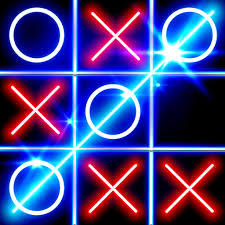

## 2 Introduction to Reinforcement Learning

Reinforcement Learning is a machine learning technique where an agent learns to make decisions by interacting with an environment and getting rewards based on the state that the agent reaches. The goal is to give the model the bare minimum amount of information, and for the model to figure out how to maximize reward over a long period of time.


  - Agent: The learner that interacts with the environment (e.g., the QN/DDQN (model) which controls what move the computer plays against you in tic-tac-toe)[2].
  - Environment: The world where the agent acts [2]
  - State: A snapshot of the environment at a particular moment (e.g., the tic-tac-toe board) [2].
  - Action: The moves the agent can make (e.g., place an X or an O) [2,3].
  - Reward: A numerical score that tells the agent how good or bad an action was (e.g. a 1 if the model wins, a -1 if the model places a letter on a preexisting letter or loses, and a 0 in all other cases) [3]
  - Policy: A strategy that the agent uses to decide its next action based on the current state. (e.g. the method the model uses to decide the next square to play) [2]

The agent’s goal is to learn a policy that *maximizes the cumulative rewards* it collects during its lifetime.

<img src="https://i.ytimg.com/vi/KEQhaBIZ9yk/maxresdefault.jpg" width="300" height="200">

## 3 Markov Decision Process

A Markov Decision Process (MDP) has the following property: Any future state is based on the current state, and not any past states [2].

  - States (S): All the possible situations the agent can encounter (in tic-tac-toe, this would be all possible boards) [2]
  - Actions (A): The choices the agent has at each state (in tic-tac-toe, there are 9 actions for the 9 possible squares to place a piece in) [2]
  - A(s) is the set of actions that can be taken in state S [2]
  - Rewards (R): Feedback from the environment for each action (the same as before). [2]
  - Transitions (T): Rules that determine how actions change the state (what happens when a letter is placed down). [2]

  MDPs may take a little bit to understand, so let's look at a few more examples. First, let's think about a drone. If our state contains the position of the drone, this is not a MDP because we rely on previous states to tell us which direction the drone is flying/spinning. However, if the state includes things like linear and angular velocity/acceleration, then this is an MDP because the current state has all the information.


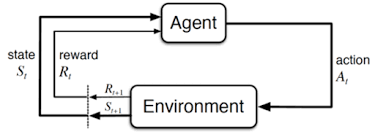

## 4 General Reinforcement Learning Concepts

### 4.1 Rewards

The agent’s job is to maximize the cumulative reward it earns. One of the key trade offs is how much to value reward in the near future vs the far future. Gamma is often used to make this distinction, where every timestep in the future is discounted by a factor of gamma. If gamma is one, that means near future rewards are valued as much as far future rewards. If gamma is zero, it means that only the current reward matters to the model. In our tic-tac-toe game, we manually set the rewards for our tic-tac-toe environment to help model convergence [5].

The cumulative reward is calculated as :$$R = r_0 + \gamma r_1 + \gamma^2 r_2 + \dots$$

Where:

- $r_0, r_1, r_2, \dots$ are the rewards over time.
- $\gamma$ is the discount factor (between 0 and 1) that controls how much the agent values future rewards [3].






### 4.2 Exploration vs. Exploitation


Another large tradeoff in our training is how much to explore vs. rely on current knowledge for the best option. Let’s say that we’re trying to find our way from LA to NYC. Let's say we have a simple reward structure of +1000 for if we reach NYC, and -1 for every hour we take. Our model starts off with zero knowledge of the environment, so it randomly explores. However, once we get to NYC, that path will always have the highest rewards [4]. However, this path could have gone through Seattle and then Florida and then Back to SF and then finally to NYC. If the model always used its knowledge to decide where to go, we’d never find a more efficient path. Thus, we need to explore new paths [4]. This idea can be applied to almost all RL applications, because there is a decent chance that the first path to a reward it finds isn’t the most optimal or the highest reward [4].

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit1/expexpltradeoff.jpg" width="300" height="200">


#### 4.2.1 Epsilon Greedy Strategy

One of the most common ways of managing this tradeoff is with a parameter typically noted as Epsilon [3]. This controls the probability of exploration or exploitation. At every state, there is a probability of epsilon that we chose a random action and a probability of (1 - epsilon) that we choose the optimal action [3]. Oftentimes we start with an epsilon equal to one to encourage exploration, and decay the value of epsilon as the model learns [3].

<img src="https://pylessons.com/media/Tutorials/Reinforcement-learning-tutorial/Epsilon-Greedy-DQN/Epsilon-Greedy-DQN.jpg" width="300" height="200">

#### 4.2.2 Temperature

Another method of managing exploration vs exploitation is temperature. This is similar to epsilon for high values, where the actions are chosen nearly uniformly. However, when there is a low temperature value the actions are chosen probabilistically based on their estimated value [5]. For example, if there are two actions with a reward of 1 and 2, there would be a 33% chance of selecting the first action and 67% chance of selecting the second reward.

#### 4.2.3 Upper Confidence Bound (UCB) Factor

Finally, the last method we’ll cover is UCB. In this method, we look at a combination of estimated value and uncertainty of an action. This encourages us to explore less visited actions while also making use of known high value actions. The amount to rely on confidence vs value is often determined with a coincidence scaling parameter, c.

### 4.3 Episodes and Trajectories

#### 4.3.1 Episodes

When training an RL model, we often use the notion of episodes. One episode can be seen as one iteration through the environment [4]. Normally, an episode is either stopped when the agent reaches a terminal state or reaches a set amount of actions [4]. Terminal states may vary from winning a board game to crashing a car [4]. Similarly, the rationale behind a set amount of actions is to prevent getting stuck in an episode (like a game of chess can go in loops).

#### 4.3.2 Trajectories

Trajectories is the sequence of states, actions and rewards the agent experienced in an episode.

### 4.4 Model Based vs. Model Free

Most RL can be broken down into model based and model free environments. In model based, agents build an internal model of the environment to predict future states and rewards, which allows for planning and simulation before taking actions [2]. On the other hand, model free means the agent learns directly from trial and error interactions with the environment. It solely bases its policy on observed outcomes [2].

For example, a robot navigating a maze might use a model based approach to plan the most efficient way to get to the solution. On the other hand, a simple game like tic-tac-toe can often be learned without a model.


## 5 Q-Learning

To train our RL model we used a process called Q-learning and Double Deep Q-Learning. But before we go into the complexity of the DDQN algorithm, it is important to understand what Q-learning is in general. Q-learning is a technique that helps the agent learn the quality (Q) of each action in a state. At each particular state of our agent, we calculate the ‘state-action’ value of the agent at that state [3]. A ‘state-action’ value is the idea of being at one state and then seeing all of the possible reward options from moving to the next state. The agent chooses the action that has the highest reward value (Q-value) [3]. Simply put, the Q-value is the “quality” of the action in terms of the reward it is bringing in. We like to think of the Q-value as “If I take this action ‘a’ in this state ‘s’, the total reward I can expect over time (immediate + future) while following the best possible policy afterward looks like….” [1]

In our tic-tac-toe game environment we set the rewards for the game. A Q-table helps a learning agent decide the best moves to make based on the game state. The rows of the Q-table represent all possible board configurations (states), and the columns represent the possible actions (placing an X in any empty square). Initially, the Q-table is filled with random or zero values, as the agent knows nothing about the game. The agent then begins to play games, exploring different moves and learning from the outcomes. An example Q-table for tic-tac-toe could look like ...



<img src="https://miro.medium.com/v2/resize:fit:798/0*xHowI1EteKPA69Ds.PNG" width="300" height="200">


When the agent places an X (takes an action) on the board, the environment (opponent and game rules) responds by updating the board and potentially transitioning to a new game state. The agent receives a reward based on the outcome of the move [3]. For example, if the agent wins the game by forming a line of three Xs, it receives a reward of +1. If the game results in a loss because the opponent forms a line of three Os, the reward is -1. A draw results in a reward of 0.

As the game progresses, the agent uses the Q-learning formula to update the Q-table for the current state and action based on the reward received and the predicted future rewards from the next state [1]. Over many games, the agent refines the Q-values in the table, associating higher values with actions that lead to winning states and lower values with actions that lead to losing states [3, 1]. Through this iterative process, the Q-table becomes a strategic guide, allowing the agent to make smarter moves in future games, ultimately mastering the game of Tic Tac Toe.

In Q-learning we update our Q-table based on the bellman equation for Q-values $$Q(s, a) = r + \gamma \max_a Q(s', a)$$
 The Q-value for an action at a particular state is computed as the immediate reward for the current state action pair along with the expected future rewards from all future states starting at the next state [3]. It's recursive, so it breaks down the total future rewards into manageable steps, with each step building on the next. Simplifying this down, the current Q-value for state ‘s’ and action ‘a’ is equal to the immediate reward plus the best Q-value for the next state s′ (assuming the agent chooses the optimal action from there onward) discounted by a factor. To update the Q-value as we go through episodes of training, we use the Q-learning update equation  $$Q(s, a) = Q(s, a) + \alpha \left[ r + \gamma \max_a Q(s', a) - Q(s, a) \right]$$ [1]
. It is a variant of the bellman equation which shows how we update Q-values iteratively. We add the current state-action pair to the temporal difference error to update the Q-values iteratively. The reward for the next step plus the discounted maximum Q-value for the next state ‘s’ over all possible actions minus the current state action pair gives us the temporal difference (TD) error [3, 1]. This measures how much the Q-value Q(s,a) differs from the new estimate of the expected reward. We then scale this TD error and add it to the current state-action pair to determine how we are going to change the Q-value of the current state-action pair on the Q-table [3].



### 5.1 Training of Q-Learning Tic-Tac-Toe Model

Run these scripts to set up an environment and train a Q-learning model of tic-tac-toe. We commented our code in detail to help users understand what we did and how they relate back to concepts we explained in this notebook. Please read the code and the comments in detail and refer to sections above to make sure you understand every line of code.

In [3]:
import numpy as np
import random

class TicTacToeEnv:
    # Define constants for the players and blank spaces
    X = 1  # Player 1 (X)
    O = 2  # Player 2 (O)
    BLANK = 0  # Blank space on the board

    def __init__(self, debug=False):
        # Initialize the game environment
        self.reset()  # Start with a fresh board
        self.debug = debug  # Enable or disable debug prints

    def reset(self):
        # Reset the board to an empty state
        self.board = np.zeros(9, dtype=int)  # 1D array of 9 zeros for the board
        self.current_player = self.X  # Player X always starts first
        self.done = False  # Game is not over yet
        self.winner = None  # No winner at the start
        return self.get_state()  # Return the current state of the board

    def step(self, action):
        # Process a player's move (action)
        reward: float
        if self.done:
            # Can't make a move if the game is already over
            raise ValueError("Game is already done.")
        if self.board[action] != 0:
            # If the move is invalid (space already occupied)
            if self.debug:
                print(f"Invalid move {(self.board == 0).sum()}", end="\t")
            reward = -10  # Penalize for an invalid move
            self.done = True  # End the game
            self.winner = -self.current_player  # No valid winner, just end game
            return self.get_state(), reward, self.done, {}

        # Place the current player's mark on the board
        self.board[action] = self.current_player

        # Check if the current player has won the game
        if TicTacToeEnv.check_winner(self.board, self.current_player):
            if self.debug:
                player = "X" if self.current_player == self.X else "O"
                print(f"{player} Wins")
            self.done = True  # Game is over
            self.winner = self.current_player  # Set the winner
            reward = 100  # Reward for winning
        elif (self.board == 0).sum() == 0:
            # If the board is full and no winner, it's a draw
            if self.debug:
                print("Draw Game")
            self.done = True  # Game is over
            self.winner = 0  # No winner
            reward = 0  # No reward for a draw
        else:
            # Valid move, but no one has won yet
            reward = 0  # Neutral reward for a valid move

        # Switch to the other player's turn
        self.current_player = self.X if self.current_player == self.O else self.O

        return self.get_state(), reward, self.done, {}

    def check_draw(self):
        # Check if the board is full (no more valid moves)
        return (self.board == TicTacToeEnv.BLANK).sum() == 0

    def check_loss(self):
        # Check if the current player can lose in the next move
        for i in range(9):
            if self.board[i] == 0:  # Try every blank space
                self.board[i] = self.current_player
                if TicTacToeEnv.check_winner(self.board, self.current_player):
                    return True
                self.board[i] = 0  # Undo the move
        return False

    def get_state(self):
        # Represent the board state as a single number
        j = 0
        for i in range(9):
            j *= 3
            j += self.board[i]
        return j

    def update_board(self, j):
        # Update the board using a single number representation
        for i in range(8, -1, -1):
            self.board[i] = j % 3
            j //= 3  # Integer division

    def check_winner(board, player):
        # Check all possible winning combinations
        wins = [
            [0, 1, 2], [3, 4, 5], [6, 7, 8],  # Horizontal lines
            [0, 3, 6], [1, 4, 7], [2, 5, 8],  # Vertical lines
            [0, 4, 8], [2, 4, 6]  # Diagonal lines
        ]
        for combo in wins:
            if all(board[i] == player for i in combo):
                return True  # Found a winning line
        return False  # No winner

    def valid_actions(self):
        # Return a list of all empty spaces (valid moves)
        return [i for i in range(9) if self.board[i] == 0]

    def print_board(self):
        # Print the current state of the board for visualization
        symbols = {self.X: "X", self.O: "O", self.BLANK: " "}
        for i in range(0, 9, 3):
            # Create a row of the board
            row = [symbols[self.board[i + j]] for j in range(3)]
            print(" | ".join(row))  # Print the row
            if i < 6:
                print("---------")  # Print a separator for rows


In [4]:
import math
import numpy as np
from tqdm import tqdm
# from ticTacToeQlearningEnv import TicTacToeEnv

# Define the environment
n_states = pow(3, 9)  # Number of states in the grid world (3^9 because 3 states per cell in a 3x3 grid)
n_actions = 9  # Number of possible actions (one for each grid cell)

# Initialize the Tic Tac Toe environment
env = TicTacToeEnv()

# Initialize Q-table with zeros
# Q-table stores the Q-values for all states and actions
Q_table = np.zeros((n_states, n_actions))

# Define parameters for Q-learning
learning_rate = 0.8  # How much we update the Q-value (alpha)
discount_factor = 0.95  # How much we care about future rewards (gamma)
exploration_prob = 0.2  # Probability of exploring instead of exploiting (epsilon)
epochs = 1000000  # Number of training iterations

done = False  # Flag to indicate if the game is over

# Initialize the progress bar to show training progress
progress_bar = tqdm(total=epochs, desc="Training Progress", unit="epoch", ncols=80)

# Q-learning algorithm: the main training loop
for epoch in range(epochs):
    current_state = env.reset()  # Reset the environment to a random starting state
    done = False  # Reset the 'done' flag for the new game

    while not done:
        # Choose an action using epsilon-greedy strategy
        if np.random.rand() < exploration_prob:  # With probability epsilon, explore
            action = np.random.randint(0, n_actions)  # Choose a random action
        else:  # Otherwise, exploit the best known action
            action = np.argmax(Q_table[current_state])  # Pick the action with the highest Q-value

        # Take the chosen action and observe the next state and reward
        next_state, reward, done, _ = env.step(action)

        # Update the Q-value for the current state and action
        Q_table[current_state, action] += learning_rate * \
            (reward + discount_factor *  # Reward plus discounted future reward
             np.max(Q_table[next_state]) -  # Max Q-value of the next state
             Q_table[current_state, action])  # Subtract the old Q-value

        # Move to the next state for the next iteration
        current_state = next_state

    # Update the progress bar after each epoch
    progress_bar.update(1)

# Save the Q-table to a file so we can use it later
np.save('q_table.npy', Q_table)

# Close the progress bar after training is complete
progress_bar.close()


Training Progress: 100%|█████████| 1000000/1000000 [03:43<00:00, 4468.81epoch/s]


### 5.2 Script to Run Q-Learning Tic-Tac-Toe Model

Below is the script to run our model. After training the model, please run this! We bet you'll struggle beating our model!

In [6]:
# Import necessary libraries
# from ticTacToeQlearningEnv import TicTacToeEnv  # Import the TicTacToe environment (if it was in another file)
import numpy as np  # Import NumPy for numerical operations

# Load the pre-trained Q-table (a table the AI uses to decide the best moves)
Q_table = np.load('q_table.npy')

# Create an instance of the TicTacToe environment
env = TicTacToeEnv(debug=True)  # Enable debug mode for extra information during gameplay

# Initialize the game
done = False  # This variable tracks if the game is over
current_state = env.reset()  # Reset the game to start fresh
env.print_board()  # Display the empty game board

# Ask the player if they want to go first or let the computer go first
if input("Do you want to go first (y/n)? ") == 'n':
    # If the player says 'n', the computer makes the first move
    action = np.argmax(Q_table[current_state])  # Choose the best move based on the Q-table
    print(f"The computer plays {action}")  # Print the computer's move
    current_state, reward, done, _ = env.step(action)  # Apply the computer's move
    env.print_board()  # Display the updated board

# Start the main game loop
while not done:
    # Ask the player for their move
    i = int(input("What's your move (int 0-8)? "))  # Get the player's move as an integer
    while env.board[i] != 0:  # Check if the chosen position is valid (not already taken)
        print("Invalid Move")  # Inform the player if their move is invalid
        i = int(input("What's your move (int 0-8)? "))  # Ask for a new move

    # Apply the player's move
    current_state, reward, done, _ = env.step(i)  # Update the game with the player's move
    env.print_board()  # Display the updated board

    if not done:  # If the game is not over after the player's move
        # Computer's turn
        action = np.argmax(Q_table[current_state])  # Choose the best move using the Q-table
        print(f"The computer plays {action}")  # Print the computer's move
        current_state, reward, done, _ = env.step(action)  # Apply the computer's move
        env.print_board()  # Display the updated board


  |   |  
---------
  |   |  
---------
  |   |  
Do you want to go first (y/n)? y
What's your move (int 0-8)? 1
  | X |  
---------
  |   |  
---------
  |   |  
The computer plays 0
O | X |  
---------
  |   |  
---------
  |   |  
What's your move (int 0-8)? 2
O | X | X
---------
  |   |  
---------
  |   |  
The computer plays 3
O | X | X
---------
O |   |  
---------
  |   |  
What's your move (int 0-8)? 7
O | X | X
---------
O |   |  
---------
  | X |  
The computer plays 4
O | X | X
---------
O | O |  
---------
  | X |  
What's your move (int 0-8)? 6
O | X | X
---------
O | O |  
---------
X | X |  
The computer plays 5
O Wins
O | X | X
---------
O | O | O
---------
X | X |  


## 6 Deep Q-Learning

Deep Q-Learning is similar to Q-Learning, but instead of a Q-table we have a neural network [3]. The input layer is based on the current state of the environment, and the output layer has one node representing the Q-value for each possible action [4].

For example, let's look at tic tac toe. The input layer would consist of the nine squares, where a -1 might represent O, 0 for a blank square, and 1 for an X. The output layer would also consist of 9 outputs and would represent the Q-values for each possible action. One thing we want to point out is that it might be intuitive that there are 9 actions because some squares might be taken, but with RL we want to let the model learn the game and the rules without programming everything into the model. Instead of forcing the model to place objects on blank squares, we penalize the model for placing an X or O on another X or O.

Another example to make this clear is a game like pong. In this case, we could take three consecutive frames, and combine them (this allows the model to see the motion of the ball rather than just the current position of the ball). If each frame is 1024 pixels, our input layer would be 3072 pixels. The output layer would be three nodes, one for right, one for left, and one for not moving.


<img src="https://blog.mlq.ai/content/images/2019/07/deep-q-learning.png" width="300" height="200">

### 6.1 The Loss Function

Since Deep Q-Learning uses a neural network, we use a loss function to train it. The loss function compares our Q-value prediction and the Q-value “target”, and then uses gradient descent/backpropagation to approximate Q-values better. Our equation for the target Q value is really similar to the bellman equation: $$y_j = r_j + \gamma \max_a Q(S_{t+1}, a)$$ [3]


In words, the Q value is the sum of the immediate reward and the discounted estimate of the maximum Q value of all possible next states.

The loss function is: $$y_j - Q(\phi_j, a_j; 0)$$ [3]


Thinking about this intuitively, this simply means the target Q value minus the former Q value.

### 6.2 Sampling

The first part of our training algorithm is called sampling. We perform actions, and continuously store the observed experiences in a “replay “memory”. When we train the model, we’ll sample some of these experiences.

#### 6.2.1 Benefits of Sampling

There are key benefits of sampling. First of all, it makes it a lot more efficient to train the model [3]. The traditional, slower method involves an agent interacting with an environment, getting experiences, learning from them, and then discarding them. This process is really inefficient, and is improved by sampling.  Experience replay allows the agent to learn from the same experiences multiple times.

Additionally, a large problem when not using replay memory is forgetting previous experiences, known as catastrophic interference or catastrophic forgetting [3]. For example, if there are multiple levels to a game, the agent might forget how to beat earlier levels as it continues to play the game. Replay memory prevents this, because the agent may sample experiences from earlier on. In short, this makes it so the agent doesn’t just learn from recent experiences.

Finally, the last major benefit of sampling is that it prevents the model from correlation observation sequences, and stabilizes learning [3]. For example, if we’re training a self-driving car, this will make it so the car doesn’t just learn from the most recent experiences like stopping at consecutive red lights, but rather it will learn from a wide range of experiences, like turning on a green light and yielding to a pedestrian.


### 6.3 Double DQN using a Source and Target Network

Another large problem is that we are using the same model for the target and current Q-value, so the loss will be minimal and non optimal [5]. Every time we train the model and update the parameters, the Q-values and target - values shift. Eventually, it would converge at the optimal solution, but this process is really inefficient [5].

This is sort of like a cop chasing a robber, but the robber keeps moving. Eventually, the robber will be caught, but this “chase” would be much less efficient than going straight to the final position of the robber.

To solve this problem, we use a second neural network with fixed parameters to estimate TD Target. After multiple episodes, we copy the parameters from the source network to the target network.

This also solves another problem, which is that the best action might not be the one with the highest Q value. This is especially true when we start training and don’t know any of the weights. By having two networks, we separate the action selection from the target Q-value generation. This is similar to how in Q-learning the updating of Q values is separate from choosing the next step (where there is an “exploration” aspect to choosing the next state). This separation allows our training to be faster and more stable.


### 6.4 Training of DDQN Tic-Tac-Toe Model

Run these scripts to set up an environment and train a DDQN model of tic-tac-toe. We commented our code in detail to help users understand what we did and how they relate back to concepts we explained in this notebook. Please read the code and the comments in detail and refer to sections above to make sure you understand every line of code.

In [1]:
import numpy as np
import random

class TicTacToeEnv:
    # Define constants for the players and blank spaces
    X = 1  # Player X (uses 1)
    O = -1  # Player O (uses -1)
    BLANK = 0  # Empty spaces on the board

    def __init__(self, debug=False):
        # Initialize the game environment
        self.reset()  # Start with a fresh board
        self.debug = debug  # Enable or disable debug messages

    def reset(self):
        # Reset the board to an empty state
        self.board = np.zeros(9, dtype=int)  # Create a 1D array with 9 empty spaces
        self.current_player = self.X  # Player X always starts first
        self.done = False  # The game is not over yet
        self.winner = None  # No winner at the start
        return self.get_state()  # Return the current state of the board

    def step(self, action):
        # Process the player's move (action)
        reward: float  # This will hold the reward value

        if self.done:
            # Prevent moves if the game is already over
            raise ValueError("Game is already done.")

        if self.board[action] != self.BLANK:
            # Check if the move is invalid (space is already taken)
            if self.debug:
                print(f"Computer made an invalid move. Game over")
            reward = -10  # Penalize for invalid move
            self.done = True  # End the game
            self.winner = -self.current_player  # Opponent wins if the move is invalid
            return self.get_state(), reward, self.done, {}

        # Place the current player's symbol on the board
        self.board[action] = self.current_player

        # Check if the current player has won the game
        if TicTacToeEnv.check_winner(self.board, self.current_player):
            if self.debug:
                player = "X" if self.current_player == self.X else "O"
                print(f"{player} Wins")  # Print which player won
            self.done = True  # Mark the game as over
            self.winner = self.current_player  # Set the winner
            reward = 100  # Reward for winning
        elif (self.board == self.BLANK).sum() == 0:
            # Check if the board is full and it's a draw
            if self.debug:
                print("Draw")  # Inform that the game is a draw
            self.done = True  # Game is over
            self.winner = self.BLANK  # No winner for a draw
            reward = 0  # No reward for a draw
        else:
            # Valid move but the game continues
            reward = 0  # Neutral reward for a valid move

        # Switch to the other player's turn
        self.current_player = -self.current_player

        return self.get_state(), reward, self.done, {}

    def check_draw(self):
        # Check if there are no empty spaces left
        return (self.board == self.BLANK).sum() == 0

    def check_loss(self):
        # Check if the current player can lose in the next move
        for i in range(9):
            if self.board[i] == self.BLANK:  # Try every empty space
                self.board[i] = self.current_player  # Simulate a move
                if TicTacToeEnv.check_winner(self.board, self.current_player):
                    return True  # Found a potential loss
                self.board[i] = self.BLANK  # Undo the move
        return False

    def get_state(self):
        # Return the current state of the board
        new_board = self.board.copy()  # Copy the board
        new_board = np.append(new_board, self.current_player)  # Add the current player
        new_board = new_board.reshape(10)  # Reshape into a 10x1 array
        return self.board.copy()  # Return a copy of the board state

    def check_winner(board, player):
        # Check all possible winning combinations
        wins = [
            [0, 1, 2], [3, 4, 5], [6, 7, 8],  # Horizontal rows
            [0, 3, 6], [1, 4, 7], [2, 5, 8],  # Vertical columns
            [0, 4, 8], [2, 4, 6]  # Diagonal lines
        ]
        for combo in wins:
            if all(board[i] == player for i in combo):
                return True  # Player has a winning line
        return False  # No winner found

    def valid_actions(self):
        # Return a list of all valid moves (empty spaces)
        return [i for i in range(9) if self.board[i] == self.BLANK]

    def print_board(self):
        # Print the current state of the board
        symbols = {self.X: "X", self.O: "O", self.BLANK: " "}  # Symbols for the players
        for i in range(0, 9, 3):
            # Create a row of the board
            row = [symbols[self.board[i + j]] for j in range(3)]
            print(" | ".join(row))  # Print the row with separators
            if i < 6:
                print("---------")  # Print a horizontal line between rows


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque
# from ticTacToeEnv import TicTacToeEnv

# Define the Deep Q-Network (DQN) model
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        # Define the neural network layers
        self.fc1 = nn.Linear(input_dim, 27)  # First fully connected layer
        self.fc2 = nn.Linear(27, 9)         # Second fully connected layer
        self.fc3 = nn.Linear(9, output_dim) # Output layer

    def forward(self, x):
        # Pass the input through the network with ReLU activations
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Define the DQN Agent with a target network
class DQNAgent:
    def __init__(self, state_dim, action_dim, learning_rate=0.001, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01, buffer_size=5000, tau=0.1):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.lr = learning_rate  # Learning rate for optimization
        self.gamma = gamma  # Discount factor for future rewards
        self.epsilon = epsilon  # Initial exploration probability
        self.epsilon_decay = epsilon_decay  # Decay rate for exploration
        self.epsilon_min = epsilon_min  # Minimum exploration probability
        self.memory = deque(maxlen=buffer_size)  # Replay buffer for experience replay

        # Initialize the primary and target networks
        self.model = DQN(state_dim, action_dim)  # Primary model
        self.target_model = DQN(state_dim, action_dim)  # Target model
        self.update_target_network()  # Synchronize target and primary models initially

        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)  # Adam optimizer
        self.tau = tau  # Soft update parameter for target network

    def act(self, state):
        # Epsilon-greedy action selection
        if np.random.rand() <= self.epsilon:
            # Explore: choose a random action
            return np.random.choice(self.action_dim)
        # Exploit: choose the action with the highest Q-value
        q_values = self.model(torch.tensor(state, dtype=torch.float32))
        return torch.argmax(q_values).item()

    def remember(self, state, action, reward, next_state, done):
        # Store the experience in the replay buffer
        self.memory.append((state, action, reward, next_state, done))

    def replay(self, batch_size):
        # Ensure there are enough samples in the memory to sample a batch
        if len(self.memory) < batch_size:
            return

        # Randomly sample a batch from memory
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward  # Initialize the target as the immediate reward
            if not done:
                # Add the discounted future reward from the target model
                next_state_tensor = torch.tensor(next_state, dtype=torch.float32)
                target = reward + self.gamma * torch.max(self.target_model(next_state_tensor)).item()

            # Compute the Q-value for the current state and update the target
            state_tensor = torch.tensor(state, dtype=torch.float32)
            q_values = self.model(state_tensor)
            target_f = q_values.clone().detach()  # Copy the Q-values
            target_f[action] = target  # Update the Q-value for the taken action

            # Compute the loss (difference between actual and target Q-values)
            loss = nn.MSELoss()(q_values[action], torch.tensor(target, dtype=torch.float32))

            # Backpropagate the loss and update the model
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        # Decay epsilon to reduce exploration over time
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def update_target_network(self):
        # Copy the weights from the primary model to the target model
        self.target_model.load_state_dict(self.model.state_dict())

    def save_model(self, path):
        # Save the model parameters to a file
        torch.save(self.model.state_dict(), path)


# Training the Double DQN Agent
episode_count = 1  # Number of episodes for training
env = TicTacToeEnv()  # Initialize the Tic Tac Toe environment
state_dim = 9  # State space dimension (3x3 grid)
action_dim = 9  # Action space dimension (9 possible moves)
batch_size = 100  # Batch size for replay

# Create two agents for alternating turns
agents = [DQNAgent(state_dim=state_dim, action_dim=action_dim, gamma=1),
          DQNAgent(state_dim=state_dim, action_dim=action_dim, gamma=1)]

# Train the agents over the episodes
for episode in range(episode_count):
    state = env.reset()  # Reset the environment to start a new game
    total_reward = 0  # Initialize total reward for the episode
    done = False  # Flag to indicate if the game is over
    agent_turn = random.randint(0, 1)  # Randomly choose which agent starts

    while not done:
        # Get the current agent's action
        action = agents[agent_turn].act(state)
        # Perform the action and observe the result
        next_state, reward, done, _ = env.step(action)
        # Store the experience in the agent's memory
        agents[agent_turn].remember(state, action, reward, next_state, done)
        # Update the state and total reward
        state = next_state
        total_reward += reward
        # Alternate turns between the agents
        agent_turn = (agent_turn + 1) % 2

    # Print progress every 5000 episodes
    if not episode % 5000:
        print(f"Episode {episode + 1}: Total Reward = {total_reward}")

    # Perform experience replay for both agents
    agents[0].replay(batch_size=batch_size)
    agents[1].replay(batch_size=batch_size)

    # Update the target networks periodically
    if episode % 10 == 0:
        agents[0].update_target_network()
        agents[1].update_target_network()

# Save the trained models for both agents
agents[0].save_model("agent_0_model.pth")
agents[1].save_model("agent_1_model.pth")


KeyboardInterrupt: 

### 6.5 Script to Run DDQN Tic-Tac-Toe Model

Below is the script to run our model. After training the model, please run this. We did not get this model to fully converge, so there is a high chance you might be able to beat this model.

In [ ]:
import torch
# from ticTacToeEnv import TicTacToeEnv  # Import the TicTacToe environment
# from train import DQN  # Import the Deep Q-Network (DQN) model

# Function to load a trained model from a file
def load_model(model_path, state_dim, action_dim):
    """
    Load the trained DQN model from the specified file.
    Args:
        model_path: Path to the saved model file
        state_dim: The size of the state space (e.g., 9 for Tic-Tac-Toe)
        action_dim: The size of the action space (e.g., 9 for Tic-Tac-Toe)
    Returns:
        model: The trained DQN model
    """
    model = DQN(state_dim, action_dim)  # Create a new instance of the model
    model.load_state_dict(torch.load(model_path))  # Load the saved model weights
    model.eval()  # Set the model to evaluation mode (not training)
    return model

# Function to play a game against the AI
def play_game(model_path):
    """
    Play a game of Tic-Tac-Toe against the trained AI.
    Args:
        model_path: Path to the saved DQN model file
    """
    env = TicTacToeEnv(debug=True)  # Create a new Tic-Tac-Toe game environment
    state_dim = 9  # The game board has 9 spaces
    action_dim = 9  # There are 9 possible actions (one for each space)
    model = load_model(model_path, state_dim, action_dim)  # Load the trained model

    state = env.reset()  # Reset the game to start fresh
    done = False  # Keep track of whether the game is over

    # Main game loop
    while not done:
        # AI's turn
        action = torch.argmax(model(torch.tensor(state, dtype=torch.float32))).item()
        # Use the model to predict the best action
        print(f"Computer placed in {action}")  # Show the computer's move
        state, reward, done, _ = env.step(action)  # Apply the AI's move to the game
        env.print_board()  # Display the updated board
        if done:  # Check if the game is over after the AI's move
            break

        # Player's turn
        print("Your turn:")
        user_action = int(input("Enter your action (0-8): "))  # Get player's move
        # Validate the player's input
        while user_action < 0 or user_action > 8 or env.board[user_action] != TicTacToeEnv.BLANK:
            print("Invalid action. Please try again.")  # Inform about invalid moves
            user_action = int(input("Enter your action (0-8): "))  # Ask for a valid move
        state, reward, done, _ = env.step(user_action)  # Apply the player's move
        env.print_board()  # Display the updated board

# Run the game when the script is executed
if __name__ == "__main__":
    play_game("agent_0_model.pth")  # Use the saved model file to play the game


<ipython-input-45-b8329f9a54c5>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Computer placed in 7
  |   |  
---------
  |   |  
---------
  | X |  
Your turn:
Enter your action (0-8): 1
  | O |  
---------
  |   |  
---------
  | X |  
Computer placed in 7
Computer made an invalid move. Game over
  | O |  
---------
  |   |  
---------
  | X |  


## 7 Sources

[1] https://github.com/khpeek/Q-learning-Tic-Tac-Toe

[2] https://www.youtube.com/watch?v=nOBm4aYEYR4&t=1519s

[3] https://medium.com/@ardra4/tic-tac-toe-using-q-learning-a-reinforcement-learning-approach-d606cfdd64a3

[4] https://www.youtube.com/watch?v=XjsY8-P4WHM

[5] https://www.youtube.com/watch?v=aCEvtRtNO-M&t=4s

[6] https://www.geeksforgeeks.org/what-is-reinforcement-learning/

[7] https://www.ibm.com/think/topics/reinforcement-learning

[8] https://www.youtube.com/watch?v=0MNVhXEX9to

[9] https://www.youtube.com/watch?v=8JVRbHAVCws
